## Opening/Closing Days
#### 2011/2012: 11/12/2011-4/22/2012
#### 2012/2013: 11/14/2012-4/21/2013
#### 2013/2014: 11/13/2013-4/27/2014
#### 2014/2015: 11/15/2014-4/26/2015

In [817]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import Traffic

In [823]:
df_traf = pd.DataFrame.from_csv('data/berthoud_skiers_11_12.csv')

In [824]:
df_traf.tail()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2012-04-18,1537,1573,2,-5205
2012-04-19,1524,1661,3,-5068
2012-04-20,1806,2960,4,-3914
2012-04-21,2095,2725,5,-3284
2012-04-22,3571,1912,6,-4943


In [806]:
df_traf.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

ValueError: labels ['COUNTSTATIONID' 'COUNTDATE'] not contained in axis

In [796]:
df_traf_prim, df_traf_sec = separate_traffic_directions(df_traf)

In [771]:
df_traf_prim, df_traf_sec = sum_morning_evening_and_drop_hourly(df_traf_prim, df_traf_sec)

In [772]:
df_traf_prim.tail()

,COUNTDIR,morning_east,evening_east
FormattedDate,,,
2012-04-18,P,559,978
2012-04-19,P,500,1024
2012-04-20,P,587,1219
2012-04-21,P,653,1442
2012-04-22,P,805,2766


In [773]:
df_traf_prim['all_day_east'] = df_traf_prim.morning_east + df_traf_prim.evening_east
df_traf_sec['all_day_west'] = df_traf_sec.morning_west + df_traf_sec.evening_west

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [774]:
df_traf_all = df_traf_prim
df_traf_all['morning_west'] = df_traf_sec.morning_west 
df_traf_all['evening_west'] = df_traf_sec.evening_west
df_traf_all['all_day_west'] = df_traf_sec.all_day_west 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [775]:
df_traf_all = df_traf_all.drop('COUNTDIR', axis = 1)

In [821]:
df_traf_all.head()

,morning_east,evening_east,all_day_east,morning_west,evening_west,all_day_west
FormattedDate,,,,,,
2011-11-12,617,1458,2075,982,1137,2119
2011-11-13,809,2073,2882,648,723,1371
2011-11-14,687,1033,1720,744,863,1607
2011-11-15,549,990,1539,814,990,1804
2011-11-16,525,1170,1695,886,922,1808


In [777]:
df_traf_plot = df_traf_all.drop(['morning_east','evening_east', 'morning_west', 'evening_west'], axis = 1)

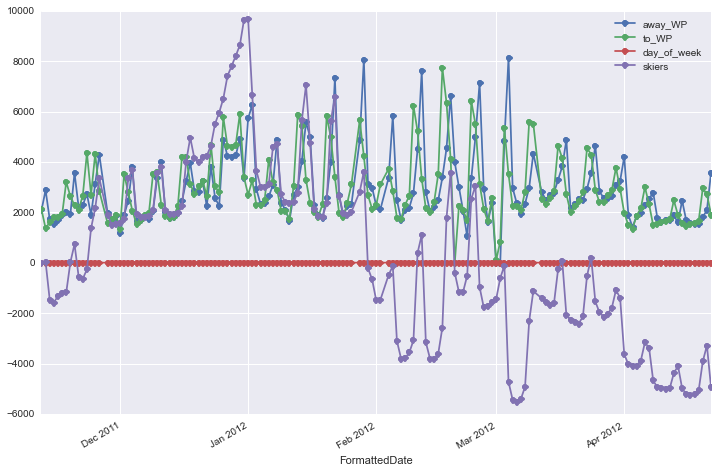

In [825]:
df_traf.plot(marker = 'o')

In [808]:
df_traf_plot.tail()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2012-04-18,1537,1573,2,-4706
2012-04-19,1524,1661,3,-4670
2012-04-20,1806,2960,4,-4533
2012-04-21,2095,2725,5,-3379
2012-04-22,3571,1912,6,-2749


In [809]:
df_traf_plot = df_traf_plot.rename(columns={'all_day_east':'away_WP', 'all_day_west':'to_WP'})

In [810]:
df_berthoud = df_traf_plot

In [811]:
df_berthoud.head()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2011-11-12,2075,2119,5,0
2011-11-13,2882,1371,6,44
2011-11-14,1720,1607,0,-1467
2011-11-15,1539,1804,1,-1580
2011-11-16,1695,1808,2,-1315


In [812]:
day_of_week = []
for idx, day in df_berthoud.iterrows():
    day_of_week.append(idx.weekday())
    
df_berthoud['day_of_week'] = day_of_week
#4 = Friday
#5 = Sat
#6 = Sun

In [813]:
df_berthoud['net_cars'] = df_berthoud.to_WP - df_berthoud.away_WP
df_berthoud['net_cars'] = df_berthoud['net_cars'].shift(1)
df_berthoud['net_cars'][0] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [814]:
skiers = []
count = 0
for idx, row in df_berthoud.iterrows():
    count += row.net_cars
    skiers.append(count)

In [815]:
df_berthoud['skiers'] = skiers

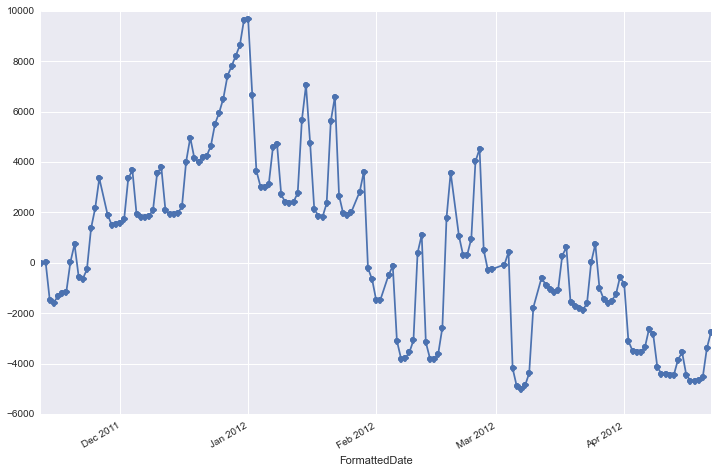

In [826]:
df_berthoud['skiers'].plot(marker='o')

In [788]:
df_berthoud.tail()

,away_WP,to_WP,day_of_week,net_cars,skiers
FormattedDate,,,,,
2012-04-18,1537,1573,2,-29,-4706
2012-04-19,1524,1661,3,36,-4670
2012-04-20,1806,2960,4,137,-4533
2012-04-21,2095,2725,5,1154,-3379
2012-04-22,3571,1912,6,630,-2749


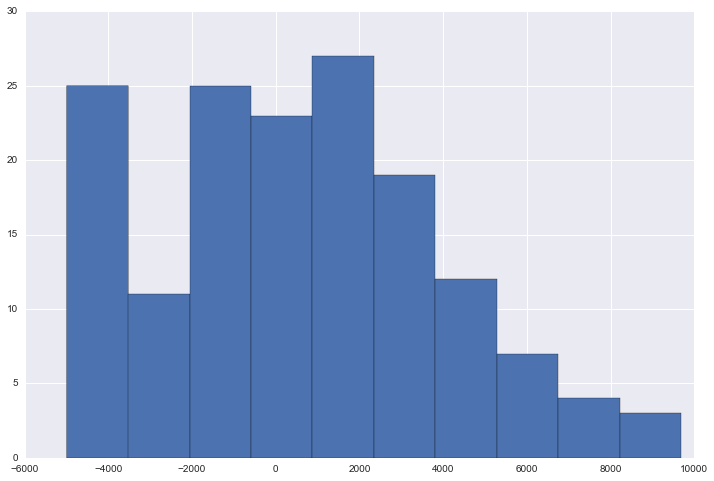

In [789]:
df_berthoud.skiers.hist()

In [790]:
df_berthoud.drop(['net_cars'], axis=1, inplace=True)

In [791]:
df_berthoud.head()

,away_WP,to_WP,day_of_week,skiers
FormattedDate,,,,
2011-11-12,2075,2119,5,0
2011-11-13,2882,1371,6,44
2011-11-14,1720,1607,0,-1467
2011-11-15,1539,1804,1,-1580
2011-11-16,1695,1808,2,-1315


In [792]:
df_berthoud.to_csv('data/berthoud_skiers_11_12.csv')

## Compare plots for the 4 years

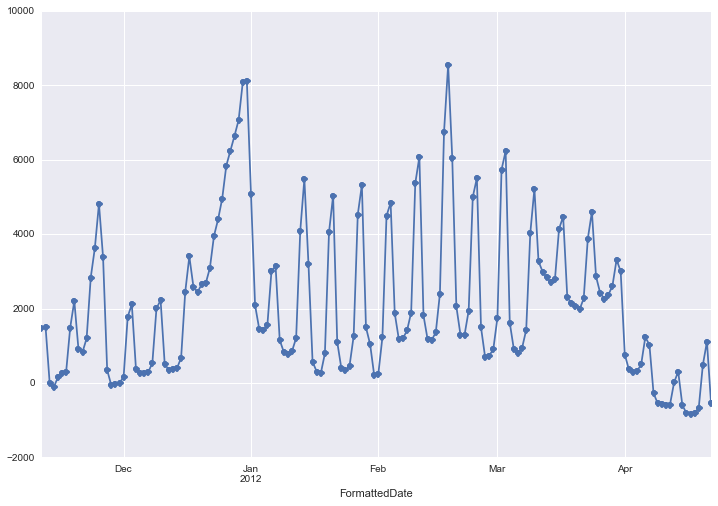

In [861]:
df_11_12 = pd.DataFrame.from_csv('data/berthoud_skiers_11_12.csv')
df_11_12['skiers'].plot(marker='o')

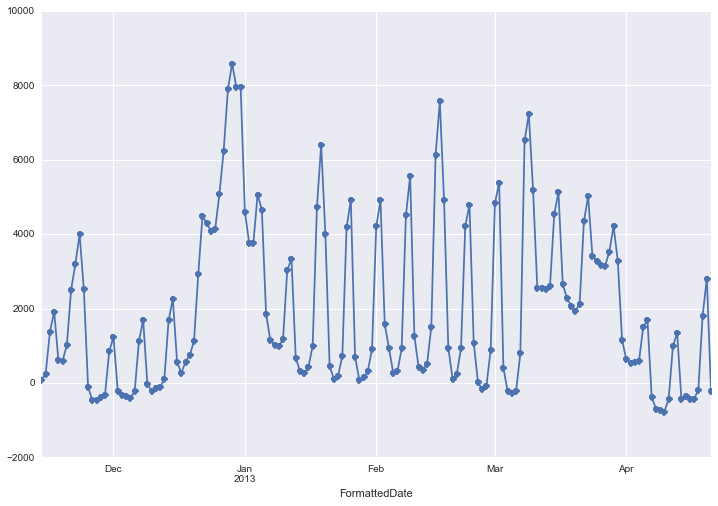

In [860]:
df_12_13 = pd.DataFrame.from_csv('data/berthoud_skiers_12_13.csv')
df_12_13['skiers'].plot(marker='o')

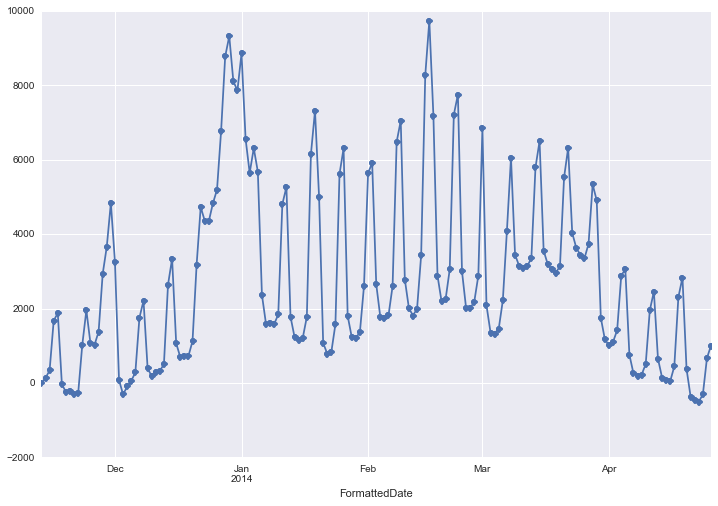

In [856]:
df_13_14 = pd.DataFrame.from_csv('data/berthoud_skiers_13_14.csv')
df_13_14['skiers'].plot(marker='o')

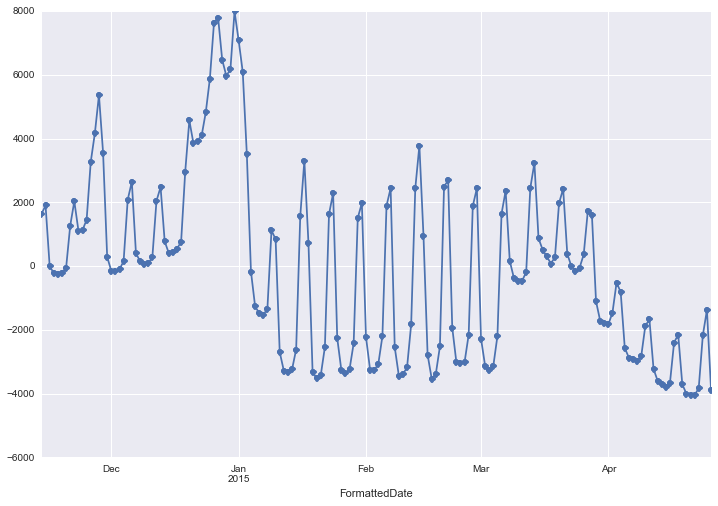

In [863]:
df_14_15 = pd.DataFrame.from_csv('data/berthoud_skiers_14_15.csv')
df_14_15['skiers'].plot(marker='o')